Your task is to develop a classifier to predict whether a patient has diabetes or not utilizing the other health information in the dataset.
Train different classifiers using various classification algorithms (e.g, KNN, Naive Bayes, Logistic Regression, Decision Tree, Random Forests, etc.)  with appropriate hyper-parameter tuning.
Compare the prediction performance of the trained models. Which model you would use to predict whether a given patient has diabetes?
Discuss your approach and  your choice for the best model.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools

import matplotlib.pylab as plt
%matplotlib inline 

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn import preprocessing

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
dfDiabetes = pd.read_csv('diabetes.csv')
dfDiabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


This dataset contains various information about diabetics, along with their associated class labels - **Diabetic or not-diabetic**.

  * **2 Classes**: diabetic or not-diabetic
  * **768 instances** (i.e, observations) where each instance represents a diabetic condition
  * **9 features or attributes** 
  * Missing Attributes: None

**Our Goal**: Using this dataset, we will build a machine learning model that uses the features to predict whether a patient is diabetic or not-diabetic.

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [5]:
type(dfDiabetes)

pandas.core.frame.DataFrame

Checking for Missing Values:

In [6]:
dfDiabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
dfDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
dfDiabetes.shape

(768, 9)

Creating Training and Test Datasets

In [9]:
X = dfDiabetes.iloc[:, 0:9].values

In [10]:
print(X.shape)
print(type(X))

(768, 9)
<class 'numpy.ndarray'>


In [11]:
Y = dfDiabetes.iloc[:, 8].values

In [12]:
print(Y.shape)
print(type(Y))

(768,)
<class 'numpy.ndarray'>


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(384, 9) (384,)
(384, 9) (384,)


In [13]:
unique_elements, counts_elements = np.unique(Y_train, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 1]
[246 138]


Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Classification Algorithms

K-Nearest Neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, weights='uniform') # initialize a KNN classifier
knn.fit(X_train, Y_train) # train classifer with training set

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
Y_train_predicted = knn.predict(X_train)

In [17]:
print("Training Classification accuracy:", knn.score(X_train, Y_train))
print("\n")
print ("Training Confusion matrix: \n" + str(confusion_matrix(Y_train, Y_train_predicted)))
print("\n")
print("Training Classification Report:\n",classification_report(Y_train, Y_train_predicted))

Training Classification accuracy: 1.0


Training Confusion matrix: 
[[246   0]
 [  0 138]]


Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00       138

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [18]:
Y_test_predicted = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(Y_test, Y_test_predicted)
print('************K-NEAREST NEIGHBOR************')
print("Test Classification accuracy:", knn.score(X_test,Y_test))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix_knn))
print("\n")
print("Test Classification Report:\n",classification_report(Y_test, Y_test_predicted))

************K-NEAREST NEIGHBOR************
Test Classification accuracy: 0.9791666666666666


Test Confusion matrix: 
[[250   4]
 [  4 126]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       254
           1       0.97      0.97      0.97       130

    accuracy                           0.98       384
   macro avg       0.98      0.98      0.98       384
weighted avg       0.98      0.98      0.98       384



Confusion matrix, without normalization
[[250   4]
 [  4 126]]


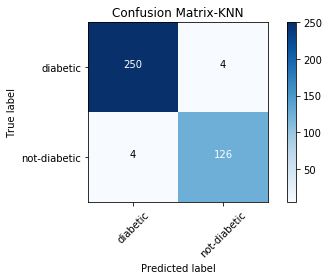

In [19]:
plt.figure()
plot_confusion_matrix(conf_matrix_knn, classes=['diabetic','not-diabetic'],
                      title='Confusion Matrix-KNN')
plt.show()

ROC Curve

In [20]:
knn.predict(X_test)[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [21]:
knn.predict_proba(X_test)[0:20]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [22]:
knn.predict_proba(X_test)[0:20, 1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1.])

In [23]:
Y_pred_prob = knn.predict_proba(X_test)[:, 1]

Area Under the Curve (AUC):
 0.9767413688673532


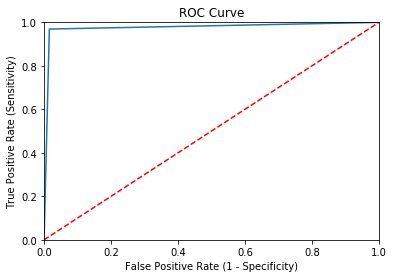

In [24]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', color='r')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print("Area Under the Curve (AUC):\n", roc_auc_score(Y_test, Y_pred_prob))
#higher AUC indicates better classifier

Tuning Hyperparameters

In [25]:
for i in range (1,6):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform') # initialize a KNN classifier
    knn.fit(X_train, Y_train)
    
    Y_pred_prob = knn.predict_proba(X_test)[:, 1]
    
    print("{0} Neighbors-UNIFORM".format(i))
    print('--------------------')
    print("Accuracy:",knn.score(X_test,Y_test))
    print("F1:",f1_score(Y_test,knn.predict(X_test),average='weighted'))
    print("ROC Curve AUC:", roc_auc_score(Y_test, Y_pred_prob))
    print()

1 Neighbors-UNIFORM
--------------------
Accuracy: 0.9791666666666666
F1: 0.9791666666666666
ROC Curve AUC: 0.9767413688673532

2 Neighbors-UNIFORM
--------------------
Accuracy: 0.9765625
F1: 0.9764469384244926
ROC Curve AUC: 0.9916111447607511

3 Neighbors-UNIFORM
--------------------
Accuracy: 0.9791666666666666
F1: 0.9791666666666666
ROC Curve AUC: 0.9930950938824956

4 Neighbors-UNIFORM
--------------------
Accuracy: 0.984375
F1: 0.9843450752393981
ROC Curve AUC: 0.9947607510599636

5 Neighbors-UNIFORM
--------------------
Accuracy: 0.984375
F1: 0.9843450752393981
ROC Curve AUC: 0.9986069049061175



In [26]:
# let's keep the best model
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform') 
knn.fit(X_train, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state = 42)
logit.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Randomn Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
 
rn_forest = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)
rn_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

SVM

In [30]:
from sklearn.svm import SVC
svc_linear = SVC(kernel = 'linear', probability= True, random_state = 42)
svc_linear.fit(X_train, Y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', probability= True, random_state = 42)
svc_rbf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
d_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

Model Evaluation

In [42]:
for model in (knn,logit,nb,rn_forest,svc_linear,svc_rbf,d_tree):
    print(model)
    print('---------------------------------------------')
    print("Accuracy:", model.score(X_test,Y_test))    
    print("F1:",f1_score(Y_test,model.predict(X_test),average='weighted'))
    print("ROC Curve AUC:", roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))
    print("\n")
    print("Classification Report:\n",classification_report(Y_test, model.predict(X_test)))
    print()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
---------------------------------------------
Accuracy: 0.984375
F1: 0.9843450752393981
ROC Curve AUC: 0.9947607510599636


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       254
           1       0.98      0.97      0.98       130

    accuracy                           0.98       384
   macro avg       0.98      0.98      0.98       384
weighted avg       0.98      0.98      0.98       384


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
--------------

According to model evaluation, best classification algorithm is:
1. Logistic Regression
2. Naive Bayes
3. Randomn Forest
4. Decision Tree Classifier

Cross Validation

In [43]:
knn_cv = KNeighborsClassifier(n_neighbors=4, weights='uniform')
knn_cv.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [44]:
scores_accuracy =  cross_val_score(knn_cv, X_train, Y_train, cv=3, scoring = 'accuracy')
scores_accuracy

array([1.       , 0.9921875, 0.96875  ])

In [45]:
scores_accuracy.mean()

0.9869791666666666

In [46]:
scores_f1_macro =  cross_val_score(knn_cv, X_train, Y_train, cv=3, scoring = 'f1_macro')
scores_f1_macro

array([1.        , 0.99155617, 0.96536797])

In [47]:
scores_f1_macro.mean() # Mean f1 score

0.9856413788731224

In [48]:
metrics = ['f1_macro', 'precision_macro', 'recall_macro', ]
scores_multiple = cross_validate(knn_cv, X_train, Y_train, cv=3, scoring = metrics)
sorted(scores_multiple.keys())  

['fit_time',
 'score_time',
 'test_f1_macro',
 'test_precision_macro',
 'test_recall_macro']

In [49]:
print('Avg. Precision:', scores_multiple['test_precision_macro'].mean())   
print('Avg. Recall:', scores_multiple['test_recall_macro'].mean())    
print('Avg. f1:', scores_multiple['test_f1_macro'].mean())   

Avg. Precision: 0.9887019627247238
Avg. Recall: 0.9834747260516084
Avg. f1: 0.9856413788731224
